# Neural Network Playground

## 1. Setup and Dependencies

Import necessary modules and configure the environment.

In [2]:
# Setup path for custom modules
import sys
import os
sys.path.append(os.path.abspath(".."))

# Import custom neural network implementation
from neuron_class import Network
from network_config import NetworkConfig
from dataset_creation import generate_all_datasets
from main import grid_search, search_radius_solutions

# Standard scientific computing libraries
from numpy import array
from tqdm import tqdm

# Training and visualization utilities
from network_trainer import train_fast, train, evaluate_performance, end_train_check
from network_visualizer import create_performance_heatmap, display_training_results, display_search_results

## 2. Dataset Generation and Network Initialization

We begin by generating synthetic datasets and setting up a baseline network configuration.

In [31]:
# Generate synthetic datasets for classification tasks
# Using fixed seed for reproducible results
datasets = generate_all_datasets(seed=1, nb_samples=128)
X, Y = datasets["circles"]  # Start with concentric circles classification

# Configure baseline network architecture and training parameters
default_config = NetworkConfig(
    dimensions=[2, 3, 2, 1],  # 2 inputs → 3 hidden → 2 hidden → 1 output
    lrng_rate=0.025,          # Learning rate for gradient descent
    nb_epochs=400,           # Maximum number of training epochs
    r=0.02,                   # L2 regularization coefficient
    end_train=True            # Enable early stopping mechanism
)

# Initialize network with specified architecture
nw = Network()
nw.build_network(default_config.dimensions)

## 3. Network Architecture Inspection

Show the internal structure and parameters of our neural network.

In [32]:
# Display network layer information and parameters
details = [1]  # Specify which layers to show detailed parameters for

print("=== NETWORK ARCHITECTURE OVERVIEW ===")
for k, layer in enumerate(nw.layers):
    if k == 0:
        print(f"Layer {k} (Input) | Neurons: {layer.nb_neurons}")
    else:
        print(f"Layer {k} (Hidden/Output) | Weights: {layer.weights.shape}, Biases: {layer.biases.shape}")
        
        # Show detailed parameters for specified layers
        if k in details:
            print("  Weight Matrix:")
            print(layer.weights)
            print("  Bias Vector:")
            print(layer.biases)
    
    print("-" * 60)  # Visual separator

=== NETWORK ARCHITECTURE OVERVIEW ===
Layer 0 (Input) | Neurons: 2
------------------------------------------------------------
Layer 1 (Hidden/Output) | Weights: (3, 2), Biases: (3, 1)
  Weight Matrix:
[[-0.32645942  0.27358371]
 [ 0.7457563   0.26570162]
 [ 1.24857814  1.66858346]]
  Bias Vector:
[[1.43713579]
 [0.61363836]
 [0.04133558]]
------------------------------------------------------------
Layer 2 (Hidden/Output) | Weights: (2, 3), Biases: (2, 1)
------------------------------------------------------------
Layer 3 (Hidden/Output) | Weights: (1, 2), Biases: (1, 1)
------------------------------------------------------------


## 4. Training Behavior Analysis

Demonstrate different training outcomes with multiple random initializations. This illustrates the stochastic nature of neural network training and the importance of proper hyperparameter tuning.

=== MULTIPLE TRAINING RUNS COMPARISON ===
Training Run 1:


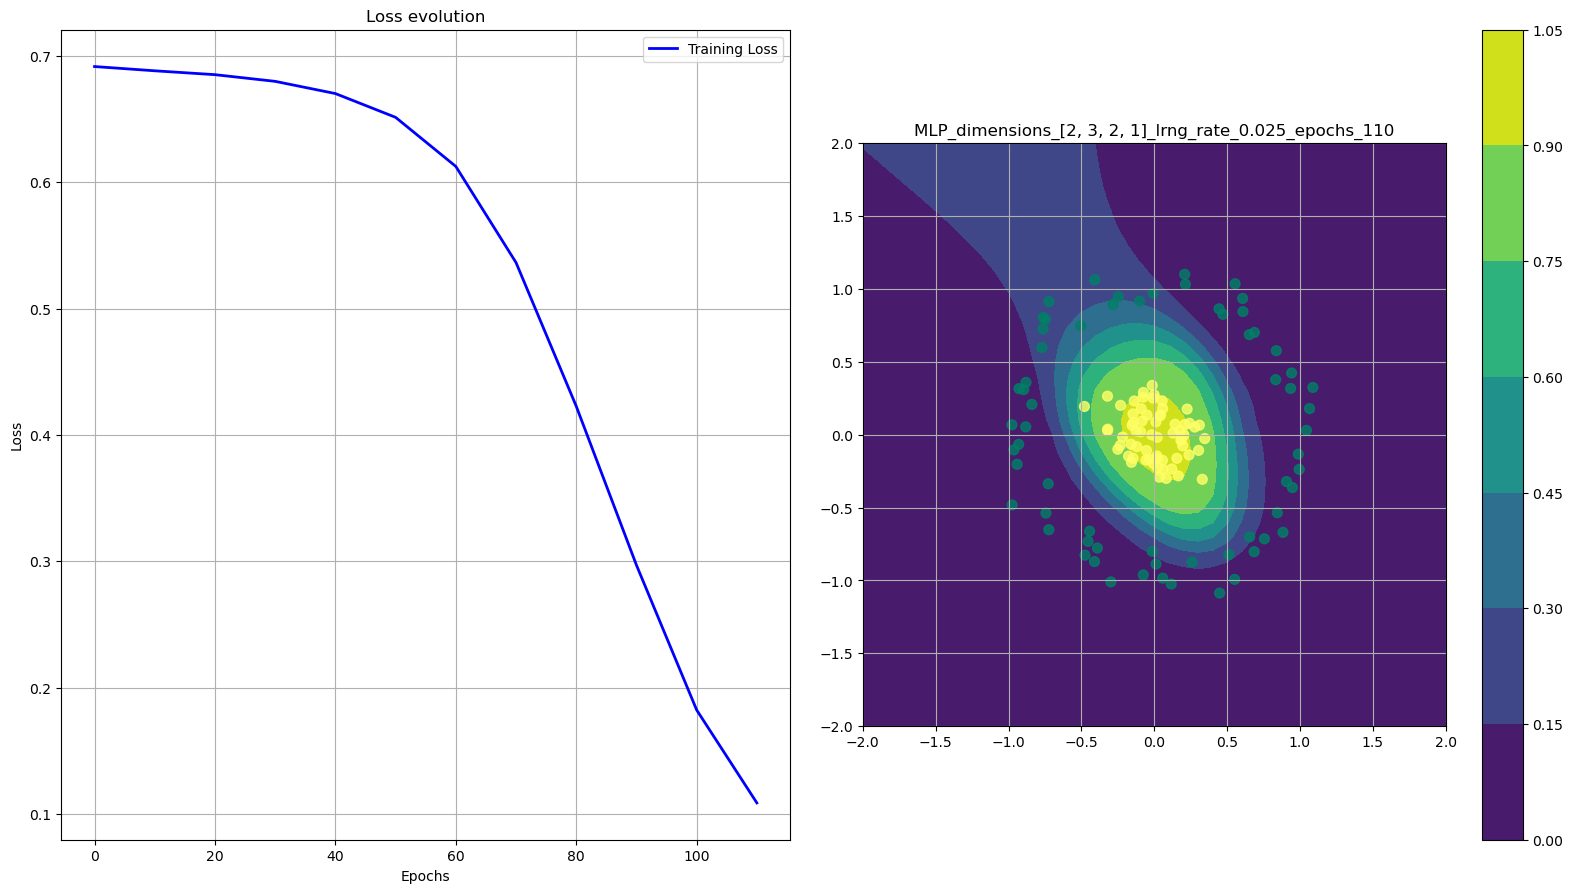



Training Run 2:


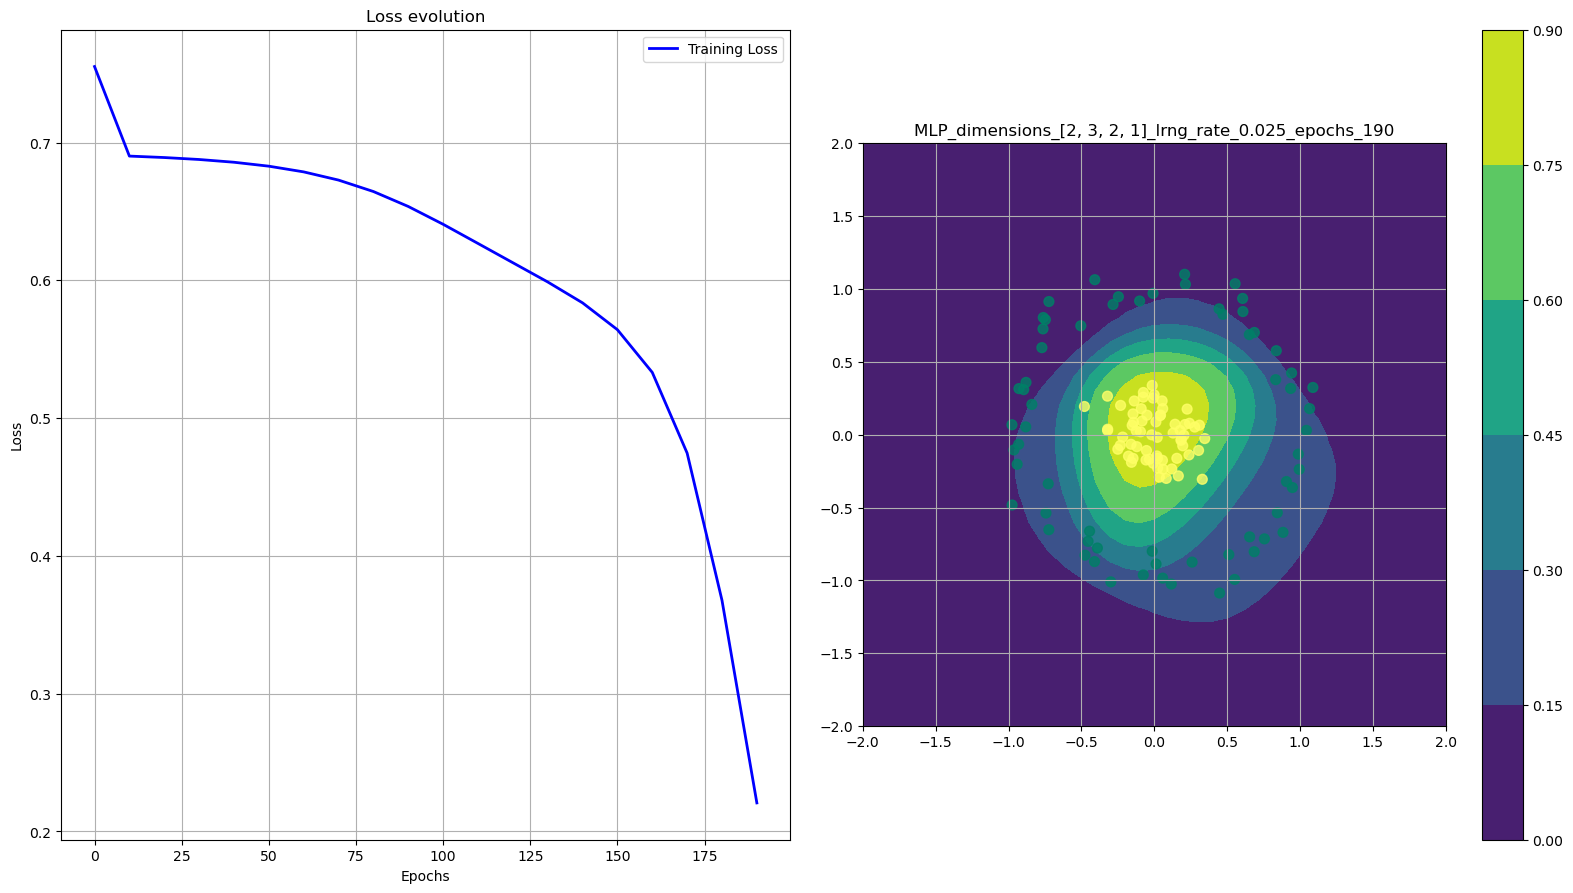



Training Run 3:


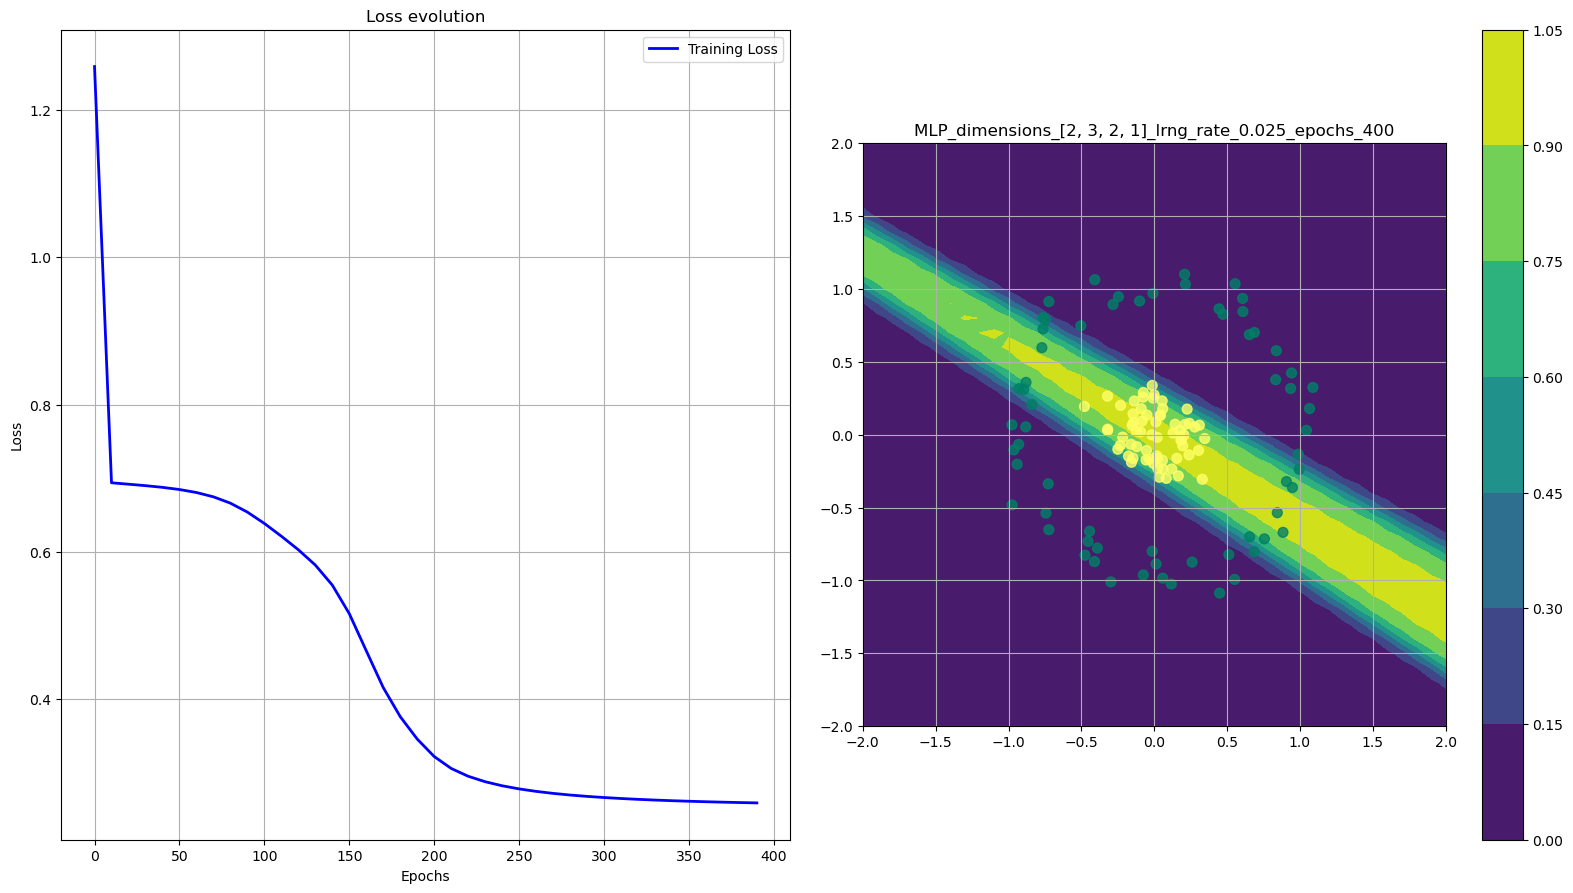

In [38]:
# Train the same architecture multiple times with different random initializations
# One can see that one training has been completed successfully while another has not yet finished or is unable to progress.
# By adjusting the learning rate, one can influence the quality of the final output.
print("=== MULTIPLE TRAINING RUNS COMPARISON ===")

for k in range(3):
    print(f"Training Run {k + 1}:")
    
    # Reinitialize network weights randomly
    Network.re_initialize(nw.layers)
    
    # Train network and store training history
    history_dict = train(nw, X, Y, default_config)
    
    # Visualize results: decision boundary, loss curves, accuracy metrics
    display_training_results(nw, X, Y, default_config, history_dict)
    
    print("\n" + "="*80 + "\n")

## 5. Hyperparameter Optimization

Systematic exploration of learning rate and epoch combinations using grid search to identify optimal training configurations.

=== HYPERPARAMETER GRID SEARCH ===


progress of mapping: 100%|███████████████████████████████████████████████████████████| 51/51 [1:10:33<00:00, 83.01s/it]


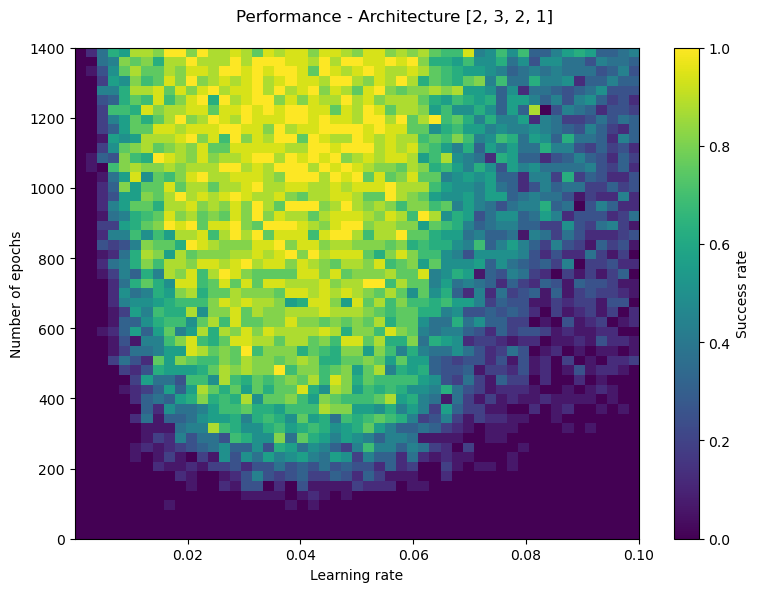

In [43]:
# Perform grid search over learning rate and epoch parameters
# This creates a heatmap showing performance across parameter combinations
print("=== HYPERPARAMETER GRID SEARCH ===")

default_config.nb_epochs = 1000

grid_search(
    X, Y, 
    [2, 3, 2, 1],
    learning_rate_range=(0.00001, 0.1, 51),  # (min, max, num_points)
    epoch_range=(0, 1400, 51),             # (min, max, num_points) 
    nb_tests=16                            # Number of runs per configuration
)

## 6. Solution Space Analysis

=== SOLUTION SPACE STATISTICAL ANALYSIS ===


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [03:01<00:00, 11.27it/s]


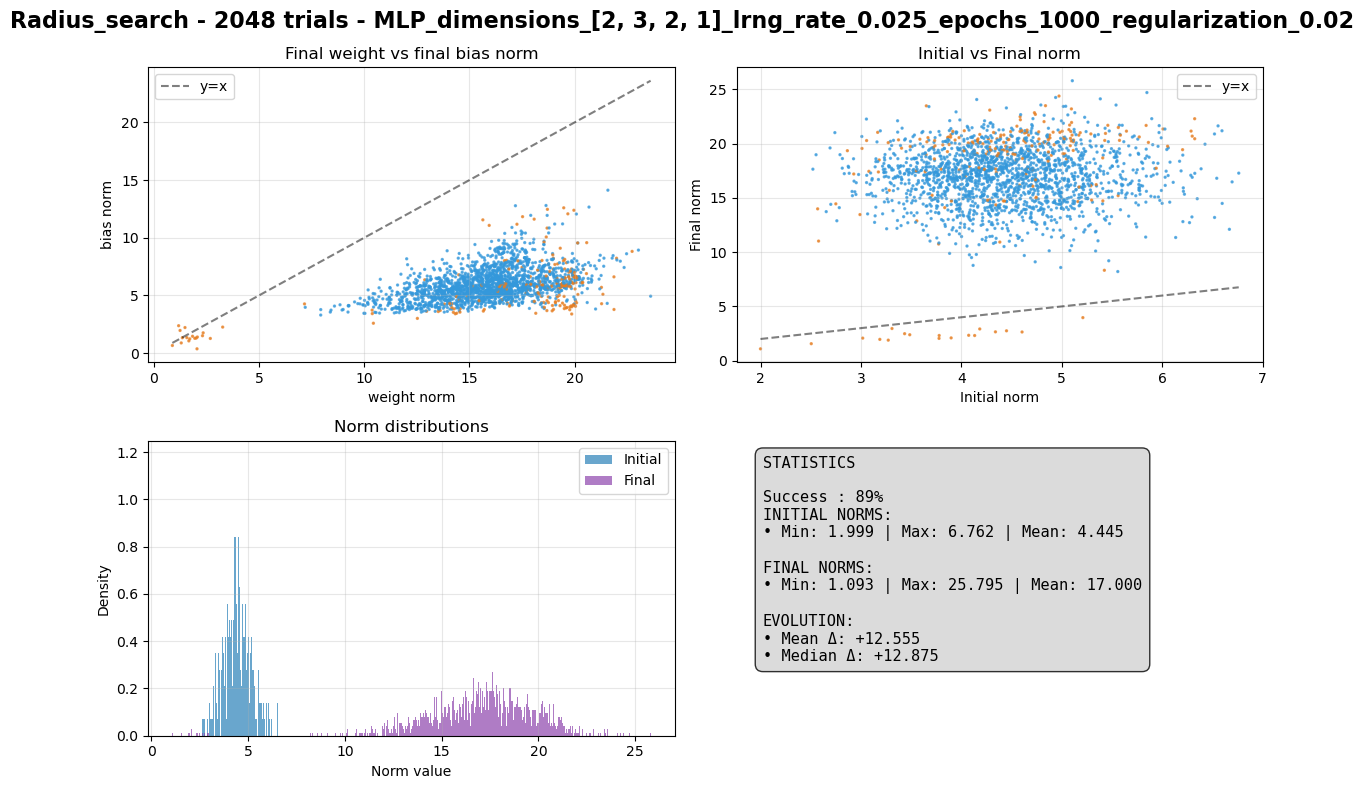

In [44]:
# For a given Networkconfig, "search_radius_solution" train an MLP n times and display the following statistics:
        # L2 norm of the biases as a function of the L2 norm of the weights,
        # L2 norm of the MLP at the end of training as a function of the norm at the beginning of training,
        # Histogram of the L2 norms of the MLP at the beginning and at the end of training, and other numerical data.
print("=== SOLUTION SPACE STATISTICAL ANALYSIS ===")

search_radius_solutions(
    2048,                # Number of independent training runs
    X, Y,
    default_config
)

Although there is no clear pattern emerging from the last graph, another configuration is more enigmatic: in the graph (top left corner) below, some bands of solutions appear.
Let's take the mlp of dimensions [2, 3, 1] which is sufficient to separate two nested circles. This also shows that under certain conditions simpler networks learn faster and more efficiently.

=== SOLUTION SPACE STATISTICAL ANALYSIS ===


100%|██████████████████████████████████████████████████████████████████████████████| 2048/2048 [01:21<00:00, 25.11it/s]


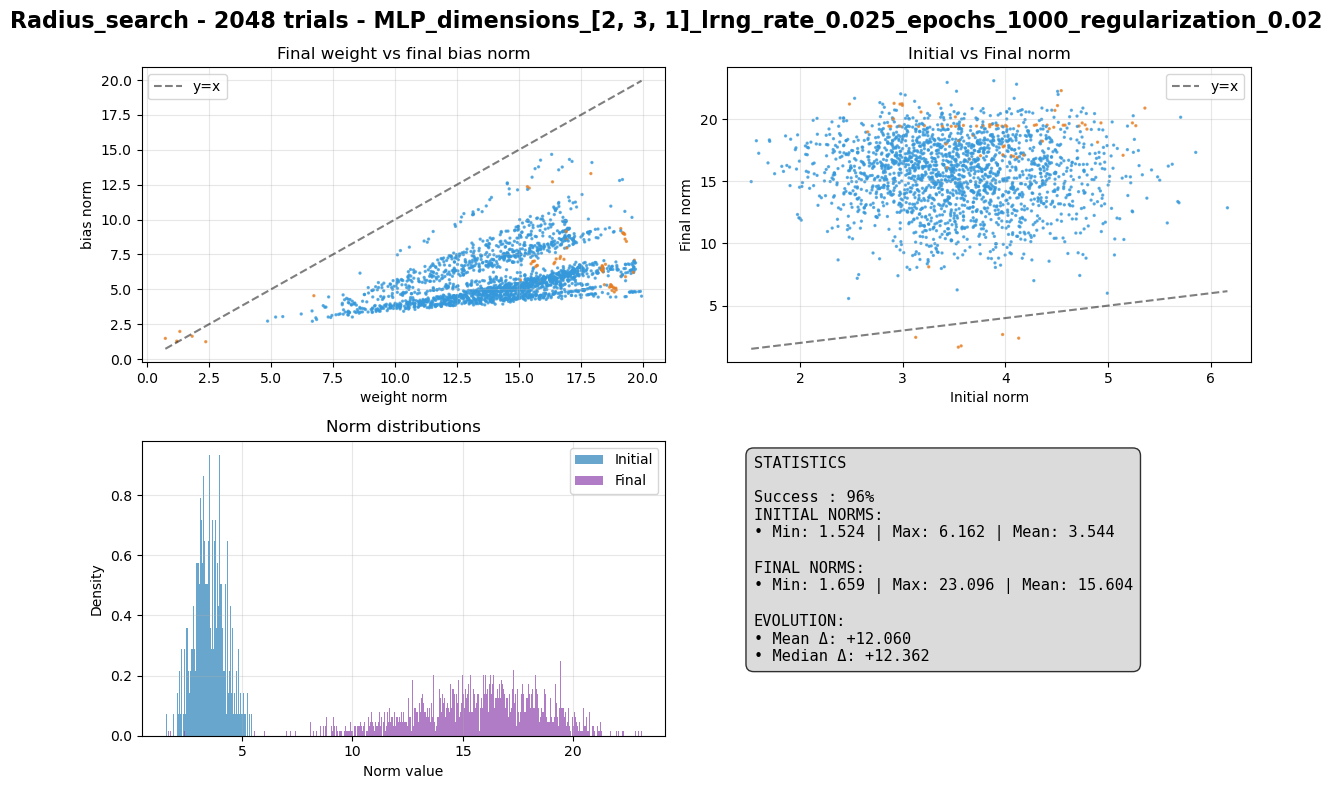

In [45]:
print("=== SOLUTION SPACE STATISTICAL ANALYSIS ===")
default_config.dimensions = [2, 3, 1]
search_radius_solutions(
    2048,                # Number of independent training runs
    X, Y,
    default_config
)

# Advanced Configurations and Complex Datasets

This section explores more challenging classification problems that require sophisticated network architectures.

## 7. Moon-Shaped Classification Problem

In [46]:
# Switch to more complex moon-shaped dataset
# This requires learning curved decision boundaries
X, Y = datasets["moons"]

# Configure network for increased complexity
# Lower learning rate for more stable training on difficult problem
new_config = NetworkConfig(
    dimensions=[2, 2, 3, 1],  # Initial architecture: minimal hidden neurons
    lrng_rate=0.005,          # Reduced learning rate for stability
    nb_epochs=2000,           # More epochs due to problem complexity
    r=0.02,                   # Same regularization
    end_train=True            # Early stopping enabled
)

=== HIDDEN LAYER WIDTH SCALING EXPERIMENT ===
Testing architecture [2, 2, 3, 1]:


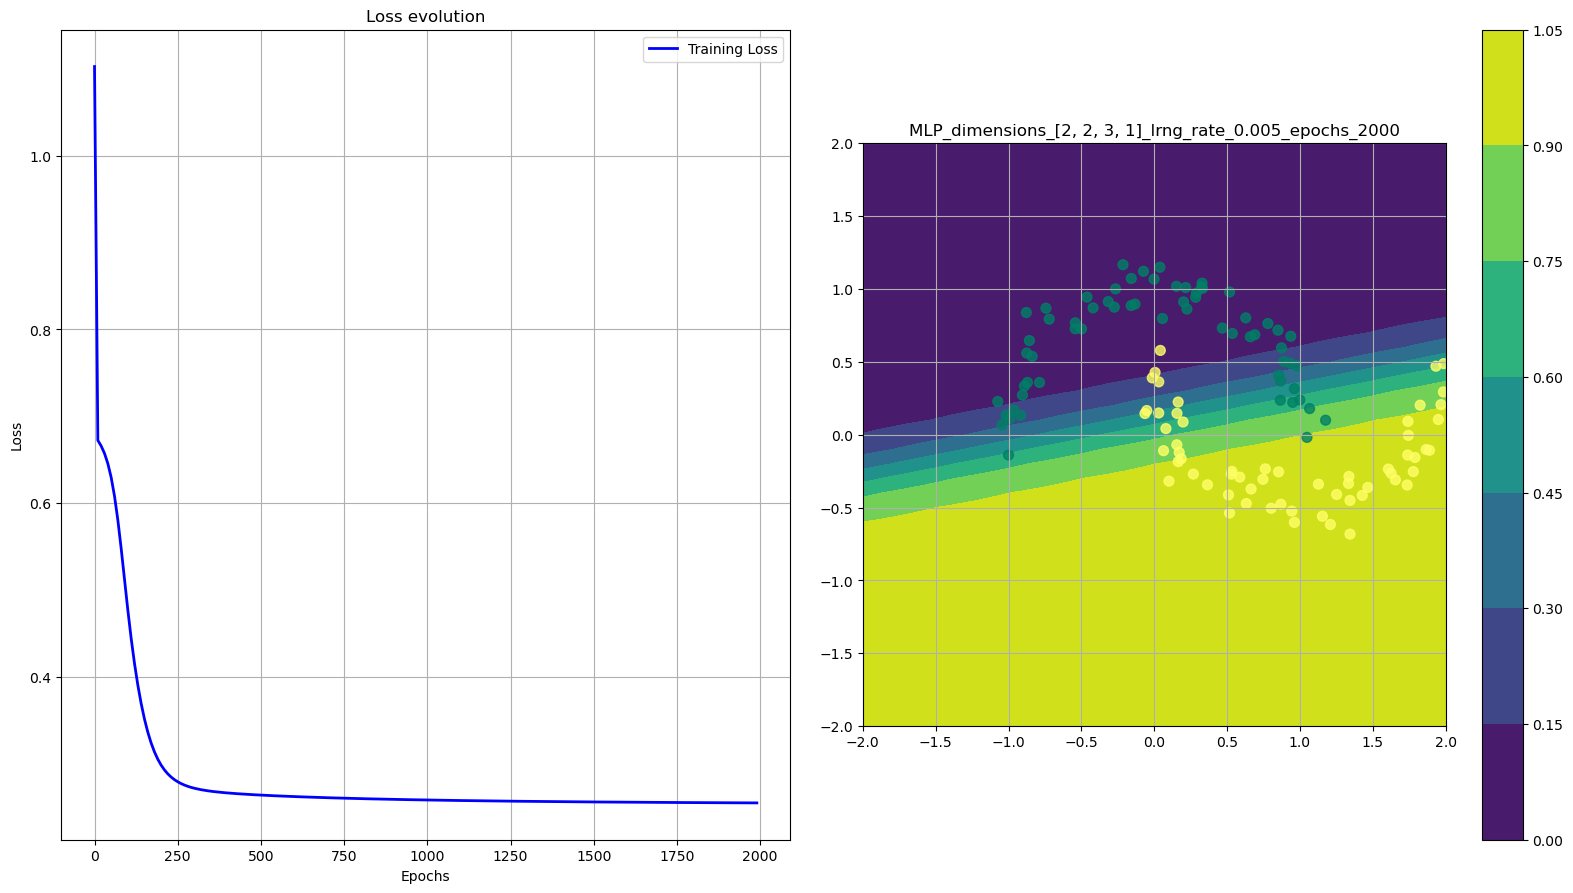


------------------------------------------------------------

Testing architecture [2, 4, 3, 1]:


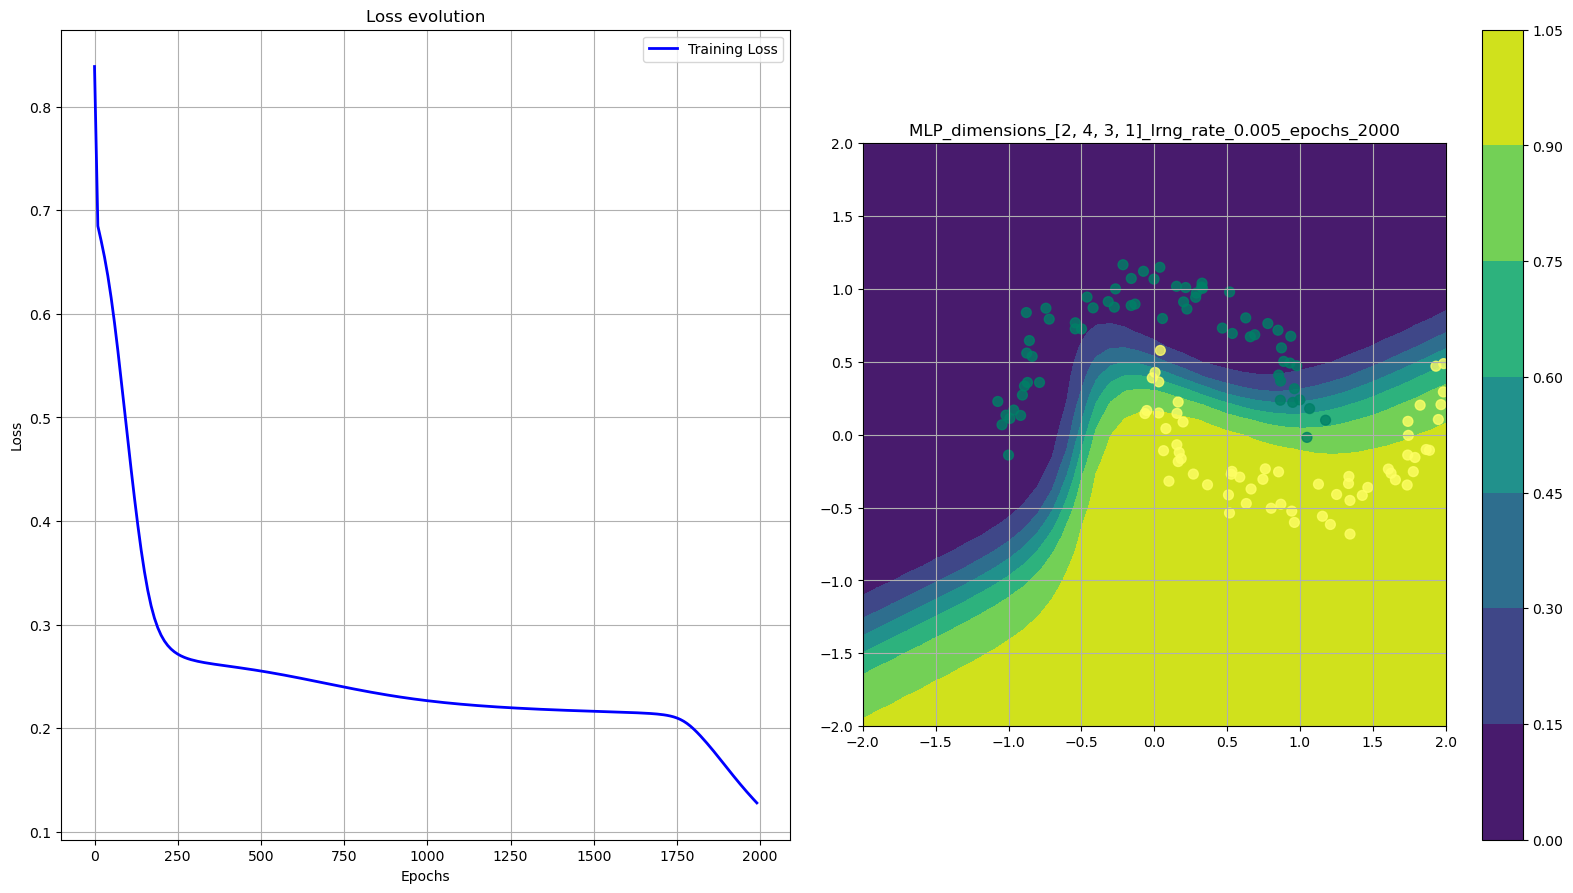


------------------------------------------------------------

Testing architecture [2, 6, 3, 1]:


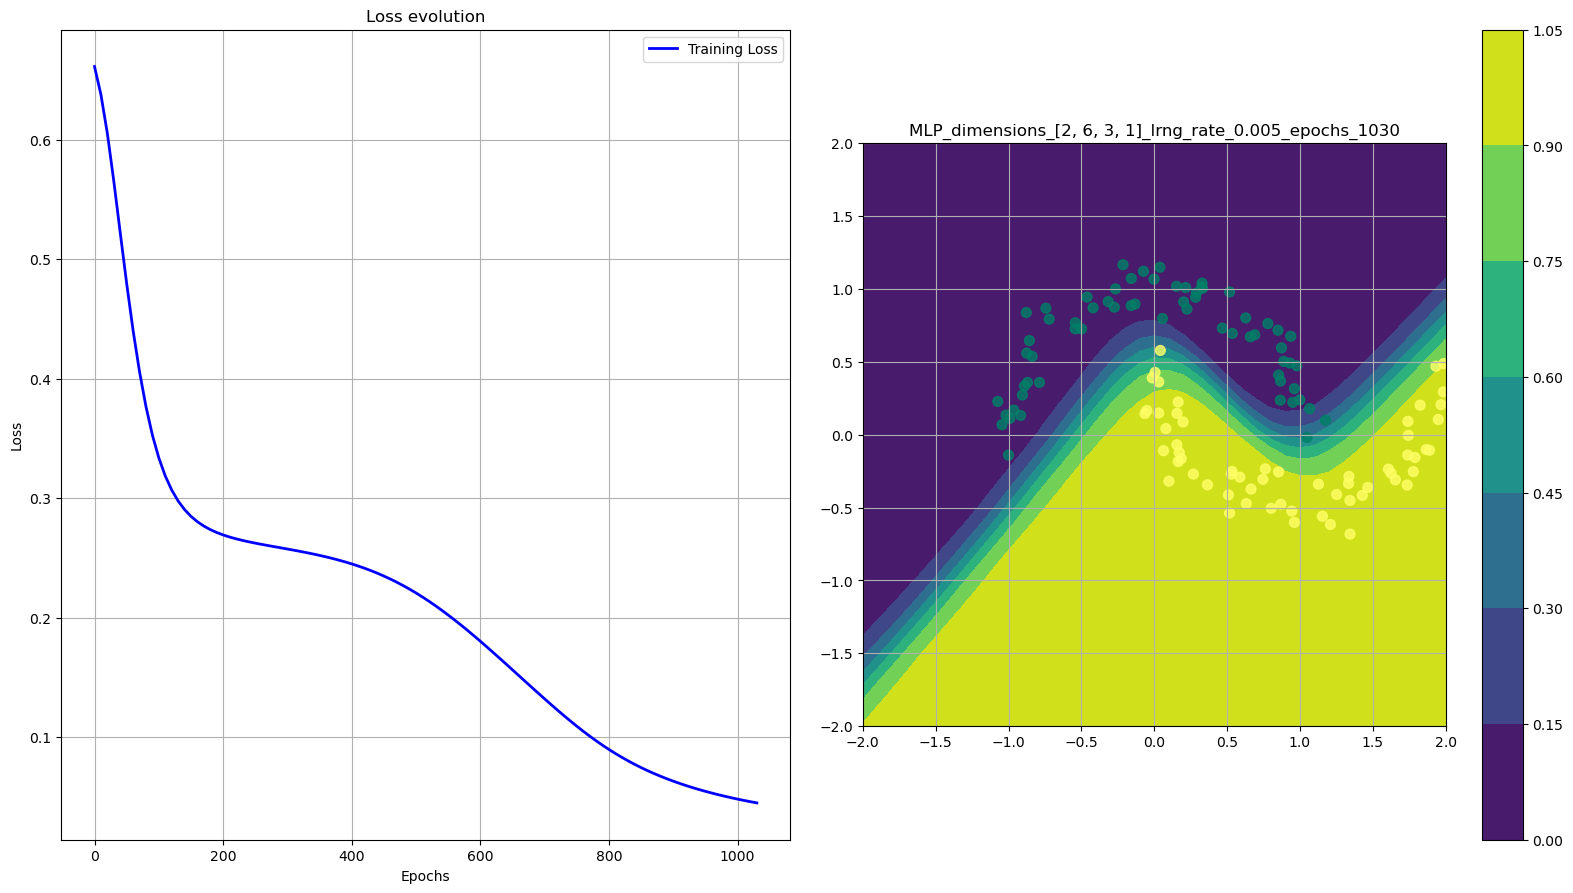


------------------------------------------------------------

Testing architecture [2, 8, 3, 1]:


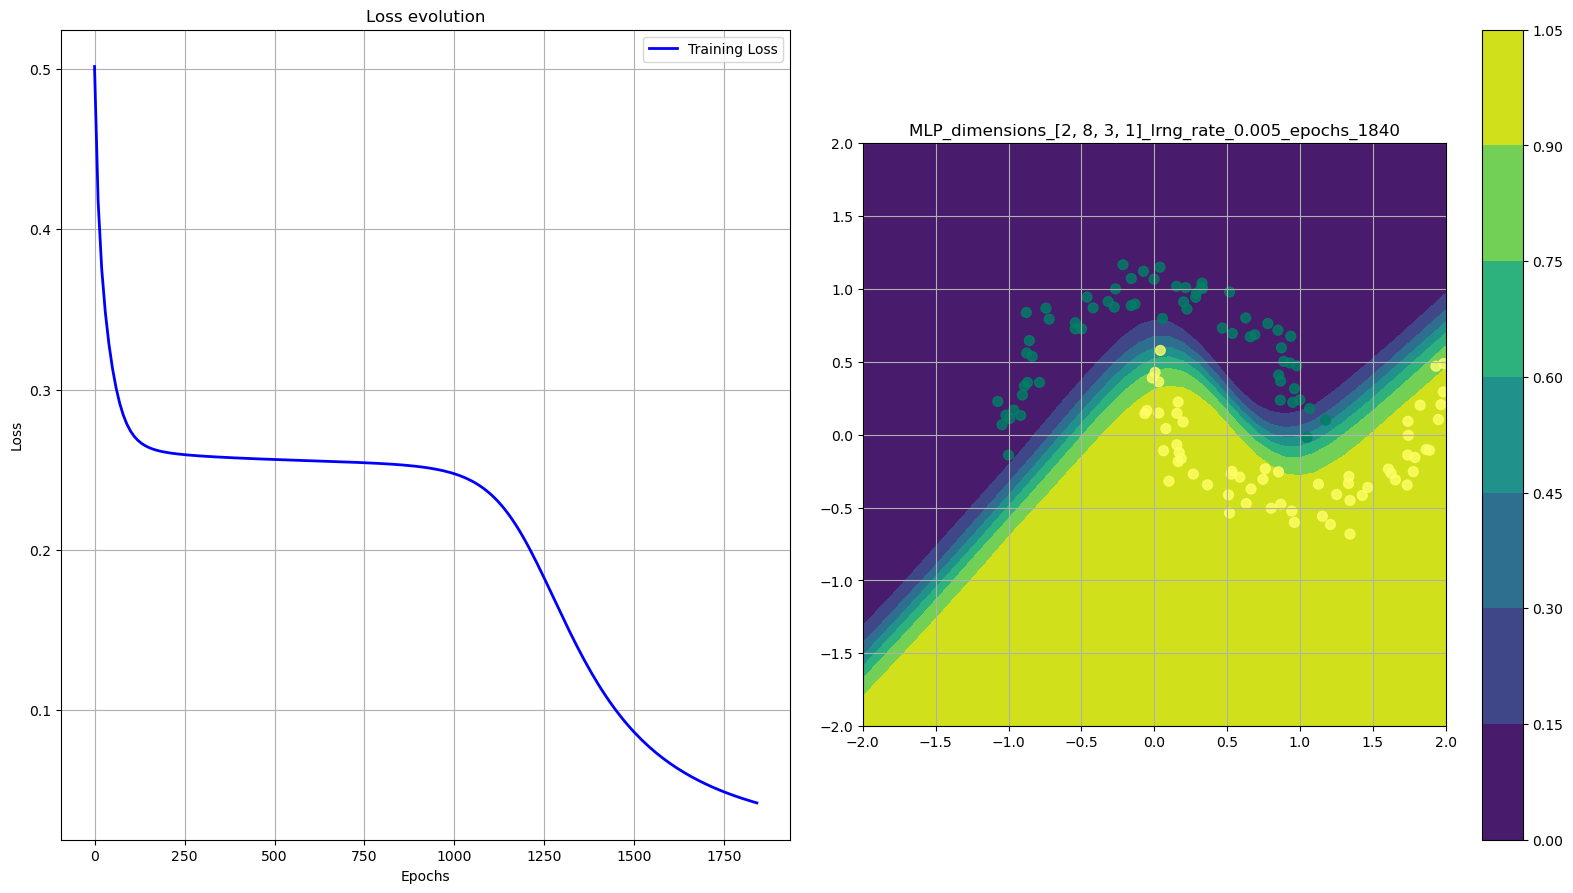


------------------------------------------------------------



In [58]:
# Experiment with increasing first hidden layer width
# Demonstrates how network first layer affects learning capability
print("=== HIDDEN LAYER WIDTH SCALING EXPERIMENT ===")

for k in range(1, 5):
    print(f"Testing architecture [2, {2*k}, 3, 1]:")
    
    # Create new network with scaled architecture
    nw = Network()
    new_config.dimensions = [2, 2 * k, 3, 1]
    
    # Train and visualize results
    history_dict = train(nw, X, Y, new_config)
    display_training_results(nw, X, Y, new_config, history_dict)
    
    print("\n" + "-"*60 + "\n")

## 8. XOR Classification Problem

=== XOR PROBLEM: WHAT NOT TO DO ===


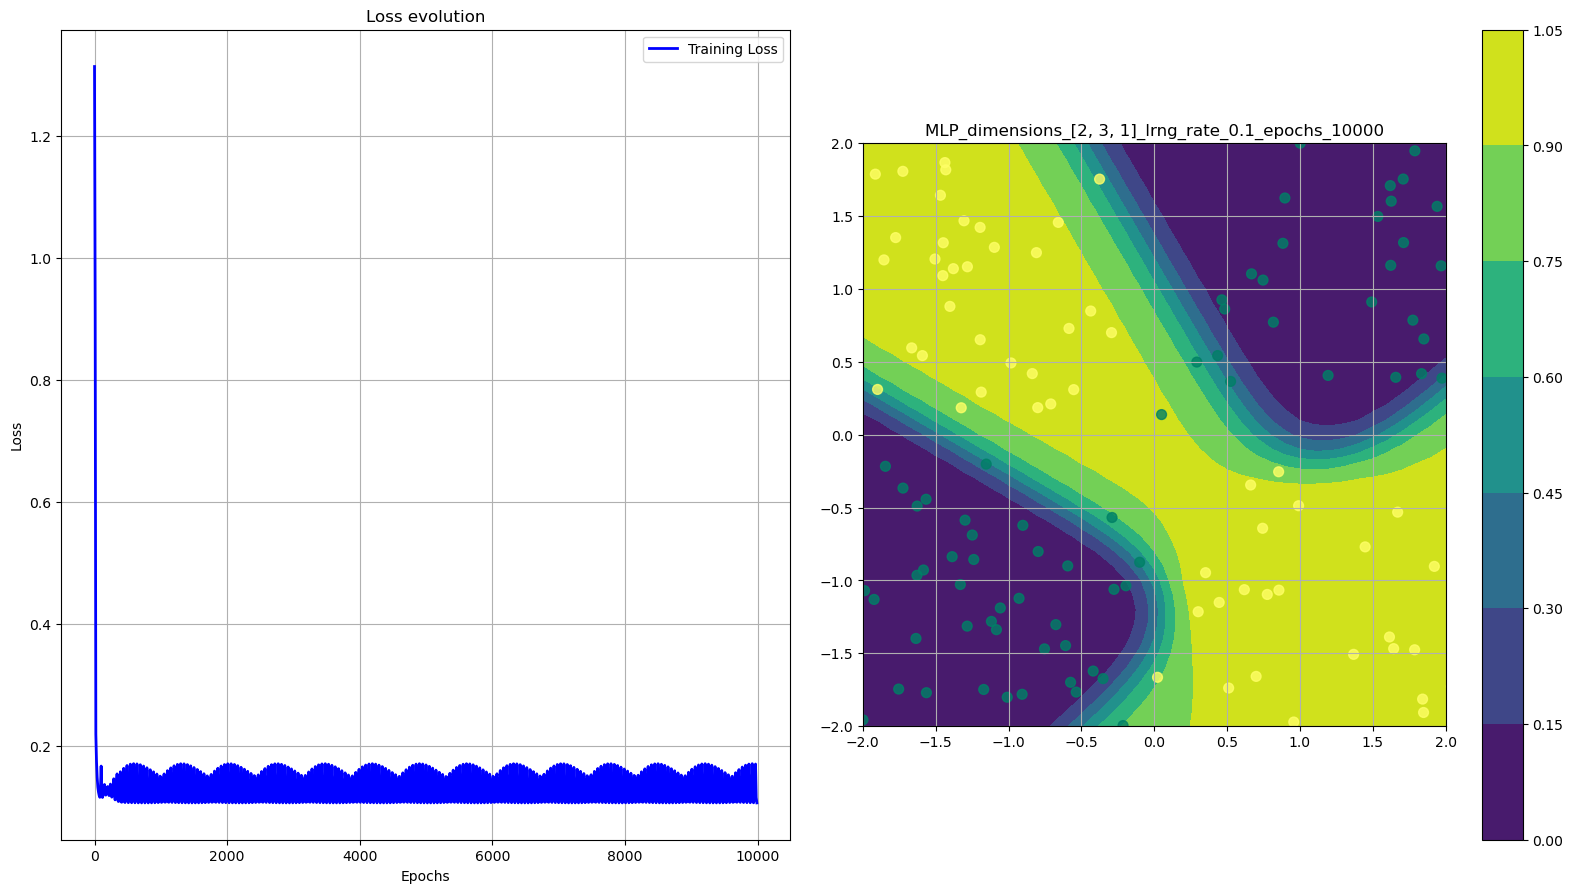

In [60]:
# Test on the xor problem to show what not to do
# A model with too few layers can no longer learn beyond a certain threshold.
# It is also noted that a step that is not too large prevents learning from a certain threshold.
X, Y = datasets["xor"]

print("=== XOR PROBLEM: WHAT NOT TO DO ===")

# Minimal architecture for XOR: single hidden layer
new_config = NetworkConfig(
    dimensions=[2, 3, 1],
    lrng_rate=0.1,            
    nb_epochs=10000,          
    r=0.02,                   
    end_train=True            
)
nw = Network()
history_dict = train(nw, X, Y, new_config)
display_training_results(nw, X, Y, new_config, history_dict)

## 9. Checkerboard Classification Problem

The previous problems show that we need to increase the number of neurons and decrease the learning rate to avoid aberrations.

=== CHECKERBOARD PATTERN: COMPLEX MULTI-REGION CLASSIFICATION ===


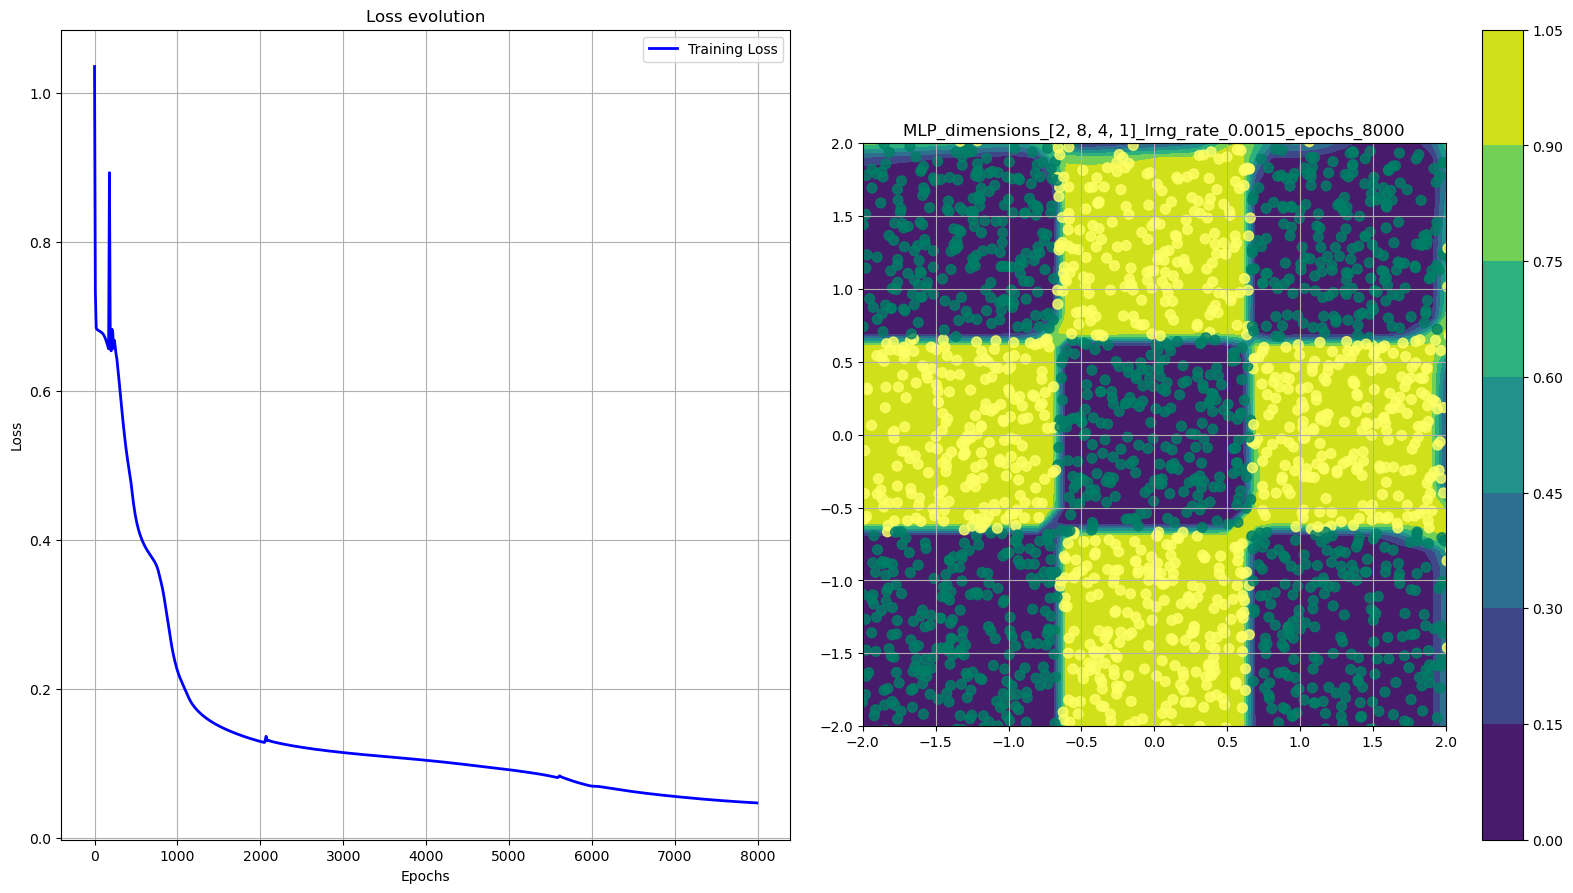

In [108]:
# Generate high-resolution datasets for complex pattern learning
# Increased sample size provides better pattern representation
datasets = generate_all_datasets(seed=2, nb_samples=2048)
X, Y = datasets["checkerboard"]

print("=== CHECKERBOARD PATTERN: COMPLEX MULTI-REGION CLASSIFICATION ===")

# Deep architecture with multiple hidden layers for complex pattern capture
# Very low learning rate for stable training on difficult problem
new_config = NetworkConfig(
    dimensions=[2, 8, 4, 1],  # Multi-layer architecture with decreasing width
    lrng_rate=0.0015,             # Very low learning rate for stability  
    nb_epochs=8000,             # Extended training for convergence
    r=0.03,                      # Standard regularization
    end_train=True               # Early stopping to prevent overfitting
)

nw = Network()
history_dict = train(nw, X, Y, new_config)
display_training_results(nw, X, Y, new_config, history_dict)

## 10. Spiral Classification Problem

=== SPIRAL PATTERN ===


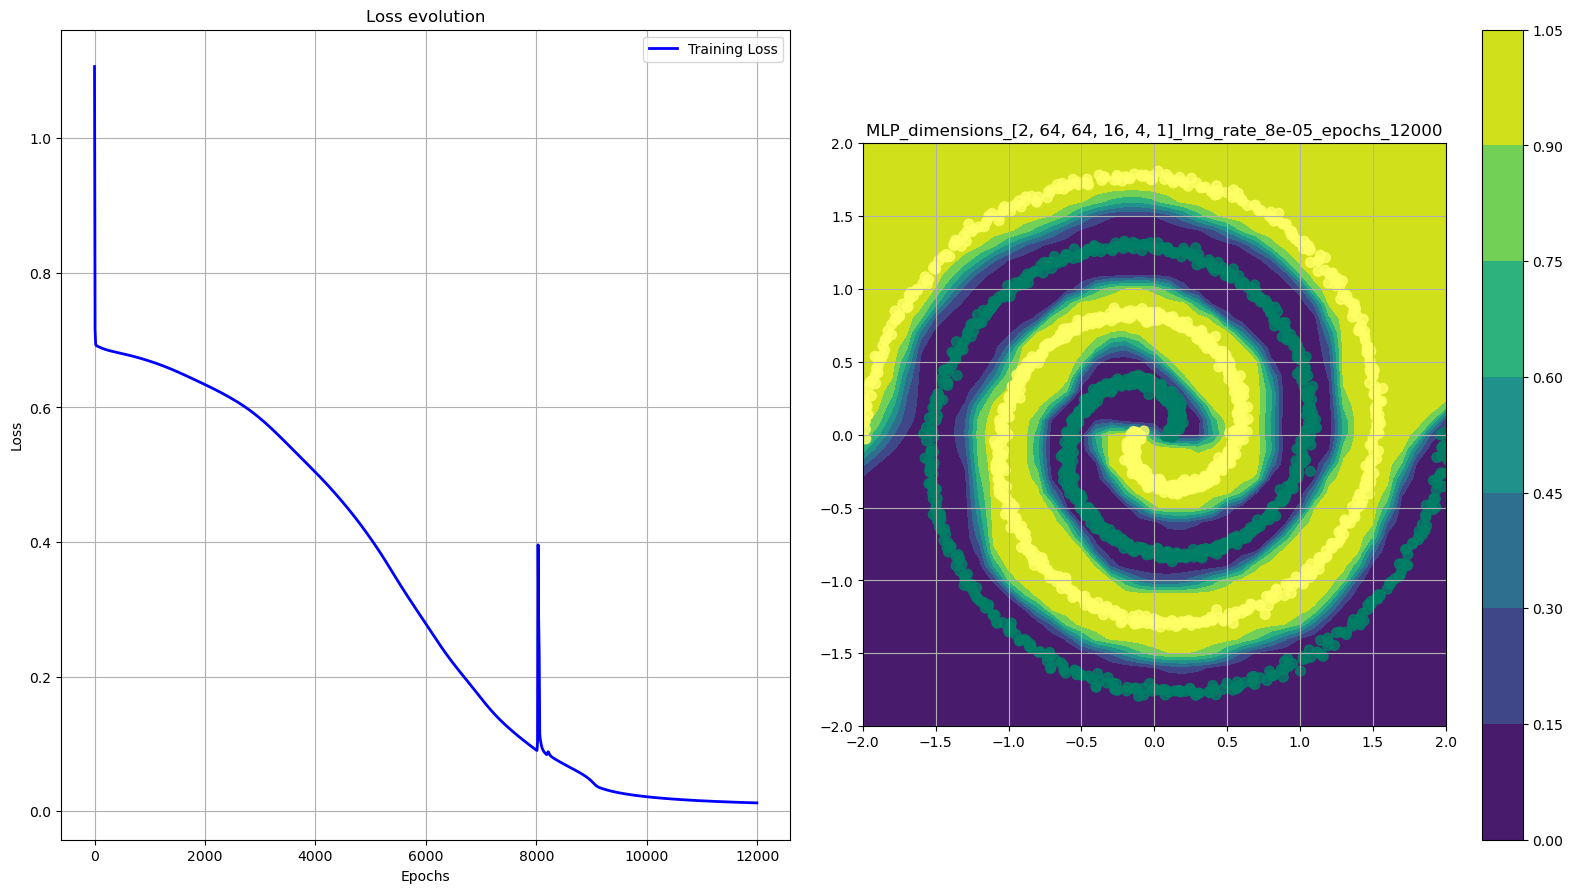

In [112]:
# More populous layers allow for capturing information from more complex point clouds.
X, Y = datasets["spiral"]

print("=== SPIRAL PATTERN ===")

new_config = NetworkConfig(
    dimensions=[2, 64, 64, 16, 4, 1],
    lrng_rate=0.00008,             
    nb_epochs=12000,               
    r=0.1,                         
    end_train=True                
)

nw = Network()
history_dict = train(nw, X, Y, new_config)
display_training_results(nw, X, Y, new_config, history_dict)